# Exercise sheet 2
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **20/04/2022**

Total points: 18 (reduced exercise sheet length due to Easter)

---



In [2]:
#I am importing packages here that I may need so they are available for the hole notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Chapter 3: Inference and Sampling

### 3.1 Metropolis Hastings (9 points)

*Topics: Multivariate normal, Metropolis Hastings and marginal distributions*

**Reading material: Murphy 24.3**

We will explore three different probability density functions, the first is 2-dim and bimodal, the other two are 10-dim and unimodal MVNs.



In [3]:
# provided

# The likelihood function is given

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(2*np.pi*sigma1**2)*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(2*np.pi*sigma2**2)*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf

def pdf_10dim_c2(x):
    """10-dim MVN"""
    mu = np.zeros(10)
    corr = 0.2
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

def pdf_10dim_c5(x):
    """10-dim MVN with stronger correlations"""
    mu = np.zeros(10)
    corr = 0.5
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

1. Write your own Metropolish Hastings algorithm. (3 points) 

- The proposal distribution is supposed to be a $D=2$ or $D=10$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array. 
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

In [ ]:
'''def MetropolisHastings(pdf, N, x_init, sigma):
  #Initialise sample and number of accepted points
  samp=[np.array(x_init)]
  accepted_points=0
  for i in range(N):
    current_point=samp[i]#initial point
    new_point=current_point+np.array(sigma)*np.random.randn()
    #The new point is the first point plus the distribution multiplyed by the sigma array in order to judge how much 'downhill we want our new
    #point to be.
    #Bellow we give the p(x) for each point 
    current_point_probability=pdf(current_point)
    new_point_probability=pdf(new_point)
    #Here we are calculating the probability ratio and the r criterium and the u
    alpha=new_point_probability/current_point_probability
    r=min(1,alpha)
    u=np.random.rand()
    #This part decides if it will keep the new point.
    if(u<r):
      accepted_points=accepted_points+1
      next_point=new_point
      new_point=current_point
    else:
      next_point=current_point
      
    samp.append(next_point)
  print("The acceptance rate for sigma=",sigma,"is : ",accepted_points/N)

  return np.array(samp)'''
 


In [9]:
def MetropolisHastings(pdf, N, x_init, sigma,D):
  #Initialise sample and number of accepted points
  samp=np.empty((0,D))
  samp=np.vstack((samp,x_init))
  accepted_points=0
  for i in range(N):
    current_point=samp[i]#initial point
    new_point=current_point+np.random.normal(scale=sigma,size=D)
    #The new point is the first point plus the distribution multiplyed by the sigma array in order to judge how much 'downhill we want our new
    #point to be.
    #Bellow we give the p(x) for each point 
    current_point_probability=pdf(current_point)
    new_point_probability=pdf(new_point)
    #Here we are calculating the probability ratio and the r criterium and the u
    alpha=new_point_probability/current_point_probability
    r=min(1,alpha)
    u=np.random.rand()
    #This part decides if it will keep the new point.
    if(u<r):
      accepted_points=accepted_points+1
      next_point=new_point
      new_point=current_point
    else:
      next_point=current_point
      
    samp=np.vstack((samp,next_point))
  print("The acceptance rate for sigma=",sigma,"is : ",accepted_points/N)

  return samp
 


2. Explore the above bimodal distribution (first example). (2 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

In [7]:
#We define a function to plot the scatter plots only for two variate functions
def scatter_plot_MH(pdf, N, x_init, sigma,D):
  y=MetropolisHastings(pdf, N, x_init, sigma,D)
  y1=[]
  y2=[]
    #Here we are seperating  the samples from the Nx2 array
  for i in range(0,len(y)):
     y1.append(y[i,0])
     y2.append(y[i,1])
  plt.figure()
  plt.scatter(y1,y2)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Scatter Plot')
  plt.show()


The acceptance rate for sigma= 0.01 is :  0.998


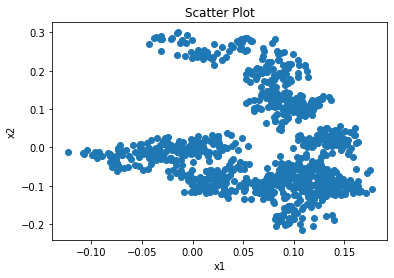

The acceptance rate for sigma= 0.1 is :  0.948


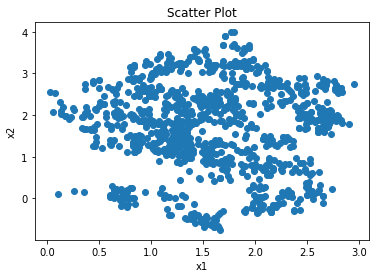

The acceptance rate for sigma= 1 is :  0.461


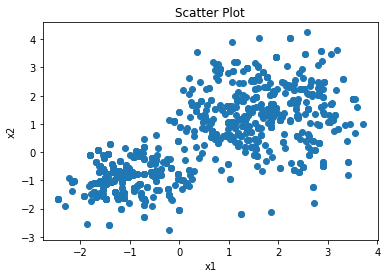

The acceptance rate for sigma= 10 is :  0.023


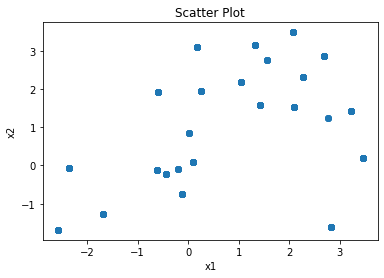

The acceptance rate for sigma= 100 is :  0.0


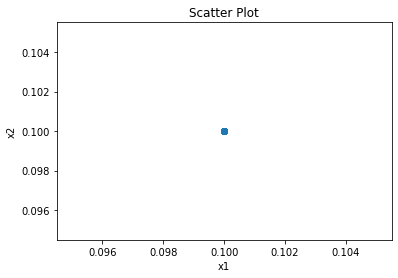

In [11]:
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 0.01,2)
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 0.1,2)
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 1,2)
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 10,2)
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 100,2)


We can see that by increasing sigma the acceptance rate drops. And the number of plot points also drops. For low sigma the acceptance rate is high because the MH doesn't go enough `downhill. In the case of large sigma it goes to much downhill so must of the points do not go in the sample.


The acceptance rate for sigma= 1 is :  0.48


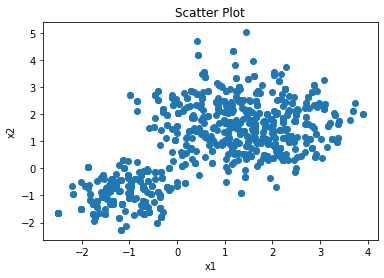

In [12]:
scatter_plot_MH(pdf_bimodal, 1000, [0.1,0.1], 1,2)

The acceptance rate for sigma= 1 is :  0.464


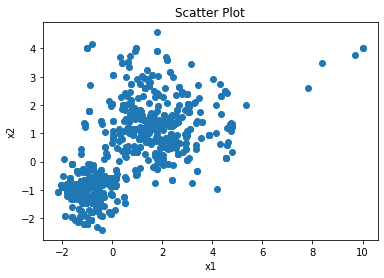

In [13]:
scatter_plot_MH(pdf_bimodal, 1000, [10,4], 1,2)

We can see that in the case of different initial points we get better acceptance ratio. This may happen because the initial point we have choosen for the second plot might be more optimal for this pdf.

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (2 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

In [14]:
#We define a function to plot the histograms plots only for two variate functions
def plot_hist_MH(pdf, N, x_init, sigma,D):
  y=MetropolisHastings(pdf, N, x_init, sigma,D)
  y1=[]
  y2=[]
  #Here we are seperating  the samples from the Nx2 array
  for i in range(0,len(y)):
     y1.append(y[i,0])
     y2.append(y[i,1])
  fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
  ax1.hist(y1,100,density=True,label='x1',color='blue')
  ax1.set_xlabel('x1')
  ax1.set_ylabel('N')
  ax1.legend()
  ax2.hist(y2,100,density=True,label='x2',color='red')
  ax2.set_xlabel('x2')
  ax2.legend()
  plt.show()


The acceptance rate for sigma= 0.01 is :  0.998


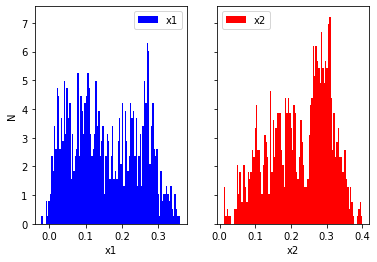

In [15]:
plot_hist_MH(pdf_bimodal, 1000, [0.1,0.1], 0.01,2)

The acceptance rate for sigma= 0.1 is :  0.964


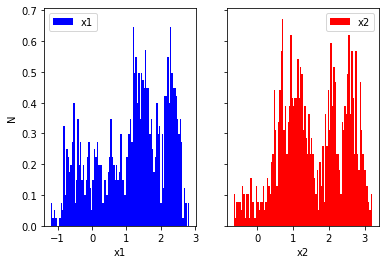

In [16]:
plot_hist_MH(pdf_bimodal, 1000, [0.1,0.1], 0.1,2)

The acceptance rate for sigma= 1 is :  0.424


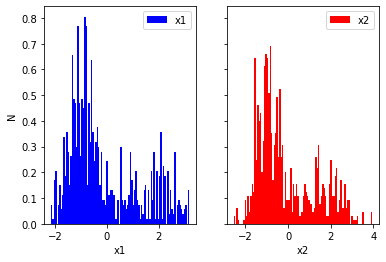

In [17]:
plot_hist_MH(pdf_bimodal, 1000, [0.1,0.1], 1,2)

The acceptance rate for sigma= 10 is :  0.011


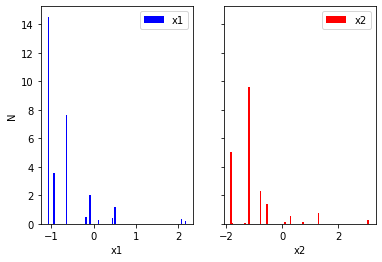

In [18]:
plot_hist_MH(pdf_bimodal, 1000, [0.1,0.1], 10,2)

The acceptance rate for sigma= 100 is :  0.001


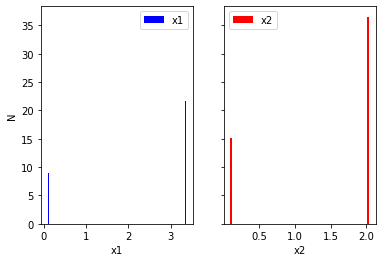

In [19]:
plot_hist_MH(pdf_bimodal, 1000, [0.1,0.1], 100,2)

Once again we can see that with the largest sigma we get less data points because the acceptance rate drops for the same reason we explained in the last question. Also we can see that we obtain the best distributions for sigma around 0.1 and 1. Which once again can be explained because we let the MH algorithm to go downhill enough but not too much downhill, so we can get good sample from the hole distributions.

4. Consider the 10-dim case. (2 point)
- Generate chains with 10000 steps, for initial values close to zero, and compare with the analytically expected result (a standard normal distribution).  
- Discuss why the acceptance rate is much lower than in the above 2-dim example, and why it becomes worse if the correlations become larger.

In [21]:
#Here we will define a function that will plot the 10 marginal distributions.
def plot_hist_MH_10D(pdf, N, x_init, sigma,D):
  y=MetropolisHastings(pdf, N, x_init, sigma,D)
  y1=[]
  y2=[]
  y3=[]
  y4=[]
  y5=[]
  y6=[]
  y7=[]
  y8=[]
  y9=[]
  y10=[]
  for i in range(0,len(y)):
     y1.append(y[i,0])
     y2.append(y[i,1])
     y3.append(y[i,2])
     y4.append(y[i,3])
     y5.append(y[i,4])
     y6.append(y[i,5])
     y7.append(y[i,6])
     y8.append(y[i,7])
     y9.append(y[i,8])
     y10.append(y[i,9])
  fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(5,2)
  fig.tight_layout()
  ax1.hist(y1,100,density=True,label='x1',color='blue')
  ax1.set_xlabel('x1')
  ax1.set_ylabel('N')
  ax1.legend()
  ax2.hist(y2,100,density=True,label='x2',color='red')
  ax2.set_xlabel('x2')
  ax2.legend()
  ax3.hist(y3,100,density=True,label='x3',color='blue')
  ax3.set_xlabel('x3')
  ax3.set_ylabel('N')
  ax3.legend()
  ax4.hist(y4,100,density=True,label='x4',color='red')
  ax4.set_xlabel('x4')
  ax4.set_ylabel('N')
  ax4.legend()
  ax5.hist(y5,100,density=True,label='x5',color='blue')
  ax5.set_xlabel('x5')
  ax5.set_ylabel('N')
  ax5.legend()
  ax6.hist(y6,100,density=True,label='x6',color='red')
  ax6.set_xlabel('x6')
  ax6.set_ylabel('N')
  ax6.legend()
  ax7.hist(y7,100,density=True,label='x7',color='blue')
  ax7.set_xlabel('x7')
  ax7.set_ylabel('N')
  ax7.legend()
  ax8.hist(y8,100,density=True,label='x8',color='red')
  ax8.set_xlabel('x8')
  ax8.set_ylabel('N')
  ax8.legend()
  ax9.hist(y9,100,density=True,label='x9',color='blue')
  ax9.set_xlabel('x9')
  ax9.set_ylabel('N')
  ax9.legend()
  ax10.hist(y10,100,density=True,label='x10',color='red')
  ax10.set_xlabel('x10')
  ax10.set_ylabel('N')
  ax10.legend()
  plt.show()


The acceptance rate for sigma= 1 is :  0.1348


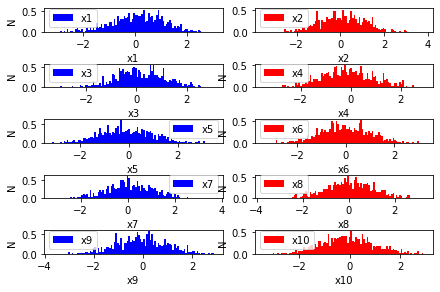

In [22]:
plot_hist_MH_10D(pdf_10dim_c2,10000, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],1,10)

The acceptance rate for sigma= 1 is :  0.0334


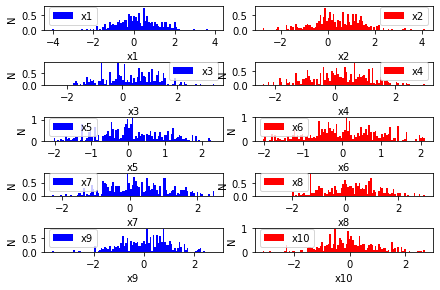

In [23]:
plot_hist_MH_10D(pdf_10dim_c5,10000, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],1,10)

From the plots above we can see that the marginal distribution come out close to the normal distribution. If we generate bigger chain or decrease sigma we can get even better results, but if we decrease sigma too much the the MH will not go downhill enough and will not take samples from the hole distribution. The acceptance rate for same sigma is a little bit lower this time and that is because in this case we have 10 parameters in each step that must be in a permitted region. So because we have more parameters it is natural to be less likely for thing to go our way in each step.

## Chapter 4: Regression (9 points) 


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

### 4.1  Polynomial Regression (5 points) 

*Topics: Unregularized regression, chi square statistic*

**Reading material: Murphy 7.2, 7.3; Bishop 3.1**

1. (1 points) $$\\ $$
Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

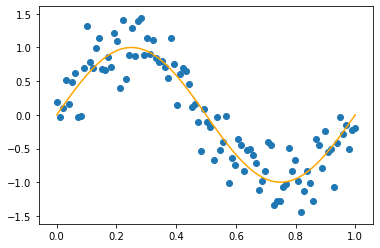

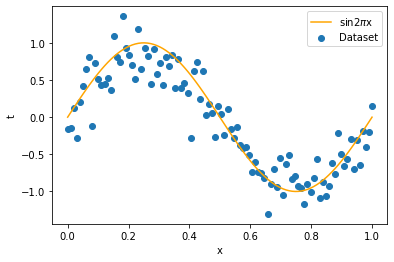

In [ ]:
def gen_sine(n):
  x=np.linspace(0,1,n)
  t=[]
  for i in range(n):
    t1=np.random.normal(math.sin(2*math.pi*x[i]),0.25)
    t.append(t1)

  return x,t

#Test your function
x,y = gen_sine(100)
y1=[]
for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))


plt.figure()
plt.scatter(x,y,label='Dataset')
plt.plot(x,y1,label=r'sin2$\pi$x',color='orange')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.show()




2. (2 points) $$\\ $$ Write a method `fit_polynomial(x, t, M)` that finds the exact solution of the maximum-likelihood of an _unregularized_ $M$-th order polynomial for some dataset `x` as explained in the lectures. The error function to minimize w.r.t. $\bw$ is:
$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$,
where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in the lecture (you can look at section 3.1.1 in Bishop or 7.3 in Murphy), and $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. As discussed in class, this has an analytical solution; this is the method you should use here.

In [ ]:
def fit_polynomial(x,t,M):
  #I am using the relationship that is given in the lecture notes on slide 16 lecture 4
  wml=[]
  phi=np.ndarray(shape=(len(x),M+1))#we use M+1 because the sum is for M-1 and in that way for M=0 we get a constant term
  for i in range(M+1): 
    for j in range(len(x)):
      phi[j,i]=x[j]**i
  alpha=np.matmul(phi.T,phi)
  beta=np.linalg.inv(alpha)
  gamma=np.matmul(phi.T,t)
  wml=np.matmul(beta,gamma)

  return wml

In [ ]:
"""Here I was trying things until I made it worked please ignore I have kept it just in case something went wrong!!!
x,t=gen_sine(50)
M=15
wml=[]
phi=np.ndarray(shape=(len(x),M))
for i in range(M): 
  for j in range(len(x)):
      phi[j,i]=x[j]**i

alpha=np.matmul(phi.T,phi)
beta=np.linalg.inv(alpha)
gamma=np.matmul(phi.T,t)
wml=np.matmul(beta,gamma)
print(phi)
print(alpha)
print(wml)"""

'Here I was trying things until I made it worked please ignore I have kept it just in case something went wrong!!!\nx,t=gen_sine(50)\nM=15\nwml=[]\nphi=np.ndarray(shape=(len(x),M))\nfor i in range(M): \n  for j in range(len(x)):\n      phi[j,i]=x[j]**i\n\nalpha=np.matmul(phi.T,phi)\nbeta=np.linalg.inv(alpha)\ngamma=np.matmul(phi.T,t)\nwml=np.matmul(beta,gamma)\nprint(phi)\nprint(alpha)\nprint(wml)'

3. (1 point) $$\\ $$ Sample a dataset with $N=50$, and fit four polynomials with $M \in (0,2,3,20)$. Plot the prediction function, along with the data and the original sine function. The resulting figures should look similar to the one provided below.
Make sure to save the $\bx$ and $\bt$ used in this exercise, as the "train" dataset.
Take a look at the optimal coefficients $\bw$ for these four cases and briefly comment their values as a function of M.


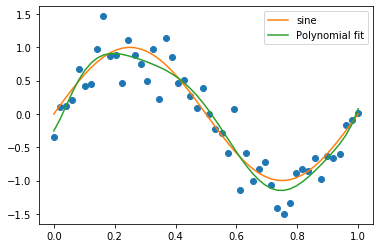

The w matrix is: [0.05090355]


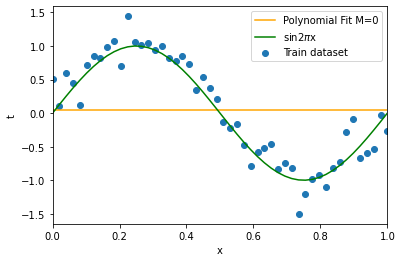

In [ ]:
#fitting for M=0
x,t=gen_sine(50)
w0=fit_polynomial(x,t,0)
y1=[]
for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))

print("The w matrix is:",w0)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.axhline(w0[0],label="Polynomial Fit M=0",color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 0.90964366 -1.49033651 -0.49873232]


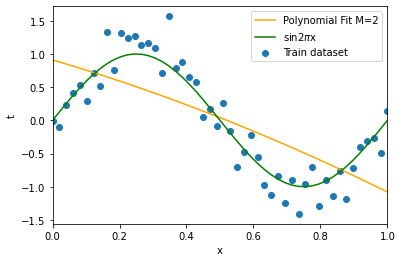

In [ ]:
#fitting for M=2
x,t=gen_sine(50)
w2=fit_polynomial(x,t,2)
y1=[]
y2=[]
for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))
  y2.append(w2[0]+w2[1]*x[i]+w2[2]*x[i]**2)
print("The w matrix is:",w2)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label="Polynomial Fit M=2",color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()



The w matrix is: [ -0.15576754  12.80609861 -38.08850666  25.76997045]


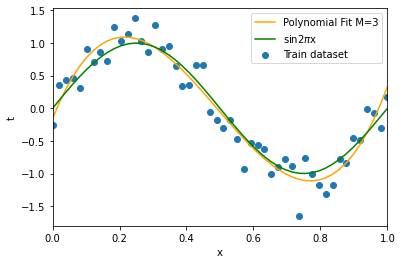

In [ ]:
#fittinf for M=3
x,t=gen_sine(50)
w3=fit_polynomial(x,t,3)
y1=[]
y3=[]

for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w3)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label="Polynomial Fit M=3",color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 8.71067197e-01 -3.57913868e+01  1.00508616e+03 -8.97760391e+03
  3.06233513e+04  1.15632461e+04 -4.41968391e+05  1.68602991e+06
 -3.59208388e+06  4.77655380e+06 -2.72213672e+06 -3.15306672e+06
  7.09908359e+06 -3.31207934e+06 -2.91864716e+06  3.89635808e+06
 -1.77430068e+06  3.76136367e+04  1.39839694e+06 -1.48770872e+06
  4.73775537e+05]


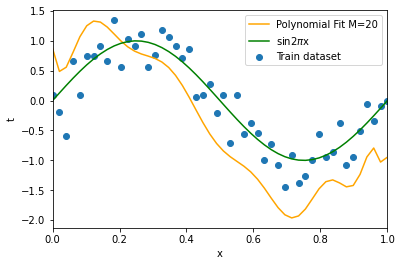

In [ ]:
#Fitting for M=20

x,t=gen_sine(50)
w20=fit_polynomial(x,t,20)
y1=[]
y20=[]

for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))
  y20.append(w20[0]+w20[1]*x[i]+(w20[2]*x[i]**2)+(w20[3]*x[i]**3)+(w20[4]*x[i]**4)+(w20[5]*x[i]**5)+(w20[6]*x[i]**6)+(w20[7]*x[i]**7)+(w20[8]*x[i]**8)+(w20[9]*x[i]**9)+(w20[10]*x[i]**10)+(w20[11]*x[i]**11)+(w20[12]*x[i]**12)+(w20[13]*x[i]**13)+(w20[14]*x[i]**14)+(w20[15]*x[i]**15)+(w20[16]*x[i]**16)+(w20[17]*x[i]**17)+(w20[18]*x[i]**18)+(w20[19]*x[i]**19)+(w20[20]*x[i]**20))
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y20,label="Polynomial Fit M=20",color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

4. (1 point) $$\\ $$  When fitting real data, it's important to always leave some data out for testing to make sure that your model is not overfitting. However, in this case, we can just generate more data to use as test data. Using your training data from the last exercise, fit polynomials with $M \in \text{range}(0,10)$. For each model, calculate the reduced chi-square statistic
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Additionally, generate 50 new observations from your $\sin(2\pi x_i)$ function and, using this as test data, calculate the **test** reduced chi-square statistic for each of your values of $M$.
Plot the training and test values of $\chi_\nu^2$ versus $M$ and briefly comment what you see.

In [ ]:
#First we create some more fitting in the given M range
#For M=5
x,t=gen_sine(50)
w5=fit_polynomial(x,t,5)
y5=[]
for i in range(len(x)):
  y5.append(w5[0]+w5[1]*x[i]+(w5[2]*x[i]**2)+(w5[3]*x[i]**3)+(w5[4]*x[i]**4)+(w5[5]*x[i]**5))
#For M=6
x,t=gen_sine(50)
w6=fit_polynomial(x,t,6)
y6=[]
for i in range(len(x)):
  y6.append(w6[0]+w6[1]*x[i]+(w6[2]*x[i]**2)+(w6[3]*x[i]**3)+(w6[4]*x[i]**4)+(w6[5]*x[i]**5)+(w6[6]*x[i]**6))
#For M=8
x,t=gen_sine(50)
w8=fit_polynomial(x,t,8)
y8=[]
for i in range(len(x)):
  y8.append(w8[0]+w8[1]*x[i]+(w8[2]*x[i]**2)+(w8[3]*x[i]**3)+(w8[4]*x[i]**4)+(w8[5]*x[i]**5)+(w8[6]*x[i]**6)+(w8[7]*x[i]**7)+(w8[8]*x[i]**8))
#For M=10
x,t=gen_sine(50)
w10=fit_polynomial(x,t,10)
y10=[]
for i in range(len(x)):
  y10.append(w10[0]+w10[1]*x[i]+(w10[2]*x[i]**2)+(w10[3]*x[i]**3)+(w10[4]*x[i]**4)+(w10[5]*x[i]**5)+(w10[6]*x[i]**6)+(w10[7]*x[i]**7)+(w10[8]*x[i]**8)+(w10[9]*x[i]**9)+(w10[10]*x[i]**10))





In [ ]:
#Now we are going to calculate the chi square statistic for each M
M_sample=[]
chi_red_sample=[]#reduced chi-square statistic sample

#For M=0
M_sample.append(0)
chi0=[]
for i in range(len(t)):
  chi0.append(((t[i]-0.04)**2)/(0.25**2))
chisq=sum(chi0)
chisqred=chisq/(len(x)-1)
chi_red_sample.append(chisqred)

#For M=2
M_sample.append(2)
chi2=[]
for i in range(len(t)):
  chi2.append(((t[i]-y2[i])**2)/(0.25**2))   
chisq=sum(chi2) 
chisqred=chisq/(len(x)-3)
chi_red_sample.append(chisqred)
#For M=3
M_sample.append(3)
chi3=[]
for i in range(len(t)):
  chi3.append(((t[i]-y3[i])**2)/(0.25**2))   
chisq=sum(chi3) 
chisqred=chisq/(len(x)-4)
chi_red_sample.append(chisqred)

#For M=5
M_sample.append(5)
chi5=[]
for i in range(len(t)):
  chi5.append(((t[i]-y5[i])**2)/(0.25**2))   
chisq=sum(chi5) 
chisqred=chisq/(len(x)-6)
chi_red_sample.append(chisqred)

#For M=6
M_sample.append(6)
chi6=[]
for i in range(len(t)):
  chi6.append(((t[i]-y6[i])**2)/(0.25**2))   
chisq=sum(chi6) 
chisqred=chisq/(len(x)-7)
chi_red_sample.append(chisqred)

#For M=8
M_sample.append(8)
chi8=[]
for i in range(len(t)):
  chi8.append(((t[i]-y8[i])**2)/(0.25**2))   
chisq=sum(chi8) 
chisqred=chisq/(len(x)-9)
chi_red_sample.append(chisqred)

#For M=10
M_sample.append(10)
chi10=[]
for i in range(len(t)):
  chi10.append(((t[i]-y10[i])**2)/(0.25**2))   
chisq=sum(chi10) 
chisqred=chisq/(len(x)-11)
chi_red_sample.append(chisqred)




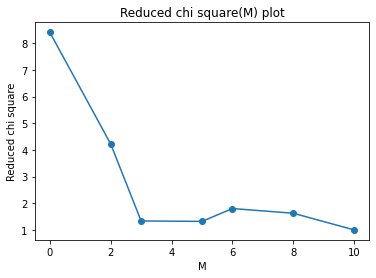

In [ ]:
plt.figure()
plt.scatter(M_sample,chi_red_sample)
plt.plot(M_sample,chi_red_sample)
plt.xlabel('M')
plt.ylabel('Reduced chi square')
plt.title('Reduced chi square(M) plot')
plt.show()

We can see that we get the best possible plots for M= 3 and for M=10 we get an even better fit. Then the reduced chi square value increases again which mean for M>3 we get bad fits. These bad fits should be due to over fitting but the reduced chi square value doesn't drop bellow 1 because we get a realy good fit for M=10 .

### 4.2 Regularized Regression (4 points) 

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1. (2 points) $$\\ $$  Write a method that finds the regularized $M$-th order polynomial for some dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [ ]:
def fit_polynomial_reg(x,t,M,lamda):
  #I am using the relationship that is given in the lecture notes on slide 29 lecture 4
  wml=[]
  phi=np.ndarray(shape=(len(x),M+1))#we use M+1 because the sum is for M-1 and in that way for M=0 we get a constant term
  for i in range(M+1): 
    for j in range(len(x)):
      phi[j,i]=x[j]**i
  alpha=np.matmul(phi.T,phi)
  beta=np.linalg.inv(lamda*np.identity(len(alpha))+alpha)#The difference is that we introduce the lambda term when are taking the inverse matrix
  gamma=np.matmul(phi.T,t)
  wml=np.matmul(beta,gamma)

  return wml

2. (1 point) $$\\ $$  Use your ``` gen_sine``` method to generate 10 datapoints, under the same conditions as before. Fit  polynomials of $M \in (0,2,3,9)$ for values $\lambda \in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot your results.

Now we are going to plot for each λ and M combination possible exept for the case of M=0 because we simply going to get straight lines.

The w matrix is: [0.05090355]


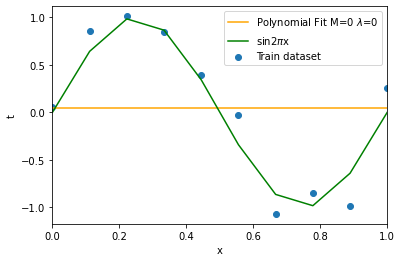

In [ ]:
x,t= gen_sine(10)
w00=fit_polynomial_reg(x,t,0,0)

y1=[]
for i in range(len(x)):
  y1.append(math.sin(2*math.pi*x[i]))

print("The w matrix is:",w0)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.axhline(w00[0],label=r'Polynomial Fit M=0 $\lambda$=0',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()




The w matrix is: [ 0.80288238 -1.65077004  0.19958647]


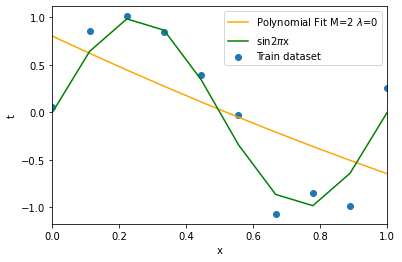

In [ ]:
#Now we will plot for M=2 lamda =0
w20=fit_polynomial_reg(x,t,2,0)
y2=[]
for i in range(len(x)):
  y2.append(w20[0]+w20[1]*x[i]+w20[2]*x[i]**2)
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label=r'Polynomial Fit M=2 $\lambda$=0',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()



The w matrix is: [ 0.79827631 -1.62493773  0.17574143]


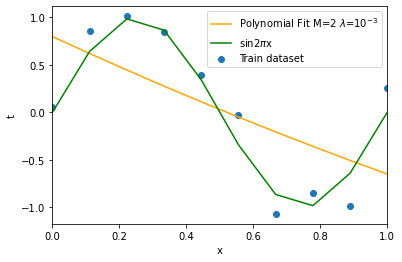

In [ ]:
#Now we will plot for M=2 lamda =10^-3
w20=fit_polynomial_reg(x,t,2,10**-3)
y2=[]
for i in range(len(x)):
  y2.append(w20[0]+w20[1]*x[i]+w20[2]*x[i]**2)
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label=r'Polynomial Fit M=2 $\lambda$=$10^{-3}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 0.80283526 -1.65050525  0.19934183]


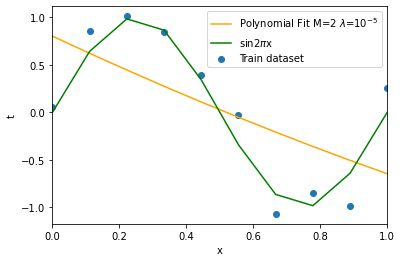

In [ ]:
#Now we will plot for M=2 lamda =10^-5
w20=fit_polynomial_reg(x,t,2,10**-5)
y2=[]
for i in range(len(x)):
  y2.append(w20[0]+w20[1]*x[i]+w20[2]*x[i]**2)
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label=r'Polynomial Fit M=2 $\lambda$=$10^{-5}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 0.76448688 -1.43923431  0.00593434]


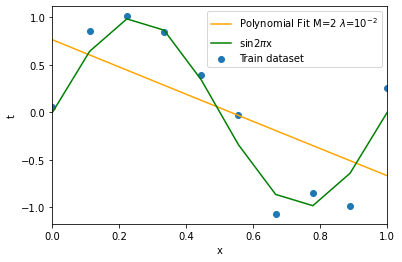

In [ ]:
#Now we will plot for M=2 lamda =10^-2
w20=fit_polynomial_reg(x,t,2,10**-2)
y2=[]
for i in range(len(x)):
  y2.append(w20[0]+w20[1]*x[i]+w20[2]*x[i]**2)
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label=r'Polynomial Fit M=2 $\lambda$=$10^{-2}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 0.00527892 -0.01189263 -0.01250401]


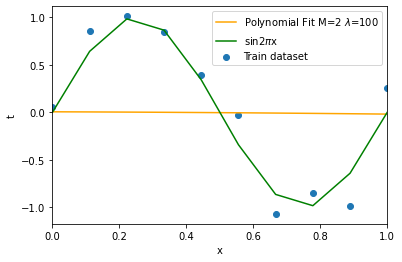

In [ ]:
#Now we will plot for M=2 lamda =100
w20=fit_polynomial_reg(x,t,2,100)
y2=[]
for i in range(len(x)):
  y2.append(w20[0]+w20[1]*x[i]+w20[2]*x[i]**2)
print("The w matrix is:",w20)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y2,label=r'Polynomial Fit M=2 $\lambda$=$100$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [-2.90209072e-03  1.16158956e+01 -3.47657038e+01  2.33101935e+01]


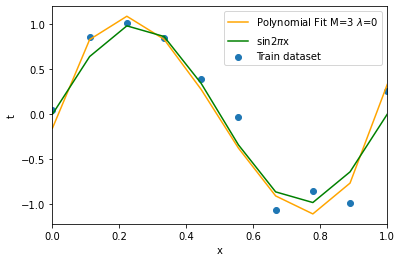

In [ ]:
#Now we will plot for M=3 lamda =0
w30=fit_polynomial_reg(x,t,3,0)
y3=[]
for i in range(len(x)):
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w30)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label=r'Polynomial Fit M=3 $\lambda$=$0$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 2.85338130e-03  1.15301949e+01 -3.45494964e+01  2.31698725e+01]


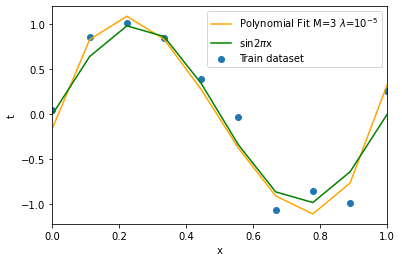

In [ ]:
#Now we will plot for M=3 lamda =10^-5
w30=fit_polynomial_reg(x,t,3,10**-5)
y3=[]
for i in range(len(x)):
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w30)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label=r'Polynomial Fit M=3 $\lambda$=$10^{-5}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [  0.35066003   6.33331982 -21.42205561  14.64392575]


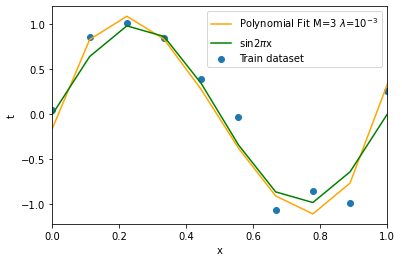

In [ ]:
#Now we will plot for M=3 lamda =10^-3
w30=fit_polynomial_reg(x,t,3,10**-3)
y3=[]
for i in range(len(x)):
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w30)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label=r'Polynomial Fit M=3 $\lambda$=$10^{-3}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 0.75548035 -0.04842719 -4.995086    3.86362889]


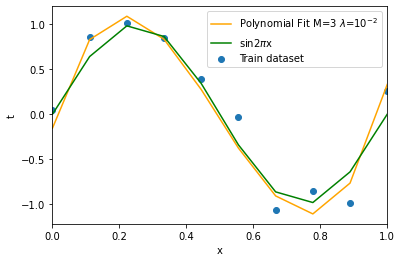

In [ ]:
#Now we will plot for M=3 lamda =10^-2
w30=fit_polynomial_reg(x,t,3,10**-2)
y3=[]
for i in range(len(x)):
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w30)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label=r'Polynomial Fit M=3 $\lambda$=$10^{-2}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 0.00552254 -0.01167753 -0.01231275 -0.01027671]


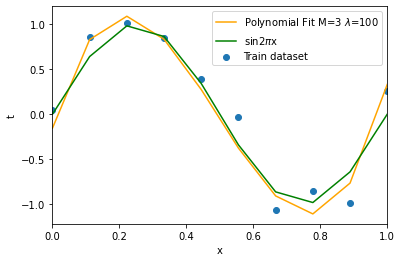

In [ ]:
#Now we will plot for M=3 lamda =100
w30=fit_polynomial_reg(x,t,3,100)
y3=[]
for i in range(len(x)):
  y3.append(w3[0]+w3[1]*x[i]+(w3[2]*x[i]**2)+w3[3]*x[i]**3)
print("The w matrix is:",w30)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y3,label=r'Polynomial Fit M=3 $\lambda$=$100$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 5.13482207e-02  1.04621370e+02 -2.25662703e+03  2.06782807e+04
 -1.00567937e+05  2.84676617e+05 -4.84365179e+05  4.87369387e+05
 -2.66807479e+05  6.11685238e+04]


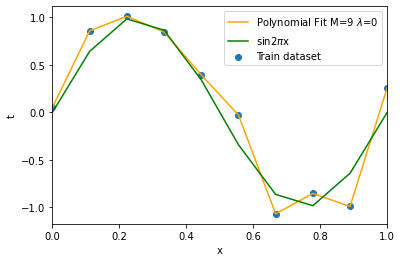

In [ ]:
#Now we plot for M=9 and lambda=0
w90=fit_polynomial_reg(x,t,9,0)
y9=[]
for i in range(len(x)):
   y9.append(w90[0]+w90[1]*x[i]+(w90[2]*x[i]**2)+(w90[3]*x[i]**3)+(w90[4]*x[i]**4)+(w90[5]*x[i]**5)+(w90[6]*x[i]**6)+(w90[7]*x[i]**7)+(w90[8]*x[i]**8)+(w90[9]*x[i]**9))

print("The w matrix is:",w90)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y9,label=r'Polynomial Fit M=9 $\lambda$=$0$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()





The w matrix is: [  0.07258118   8.94827076 -21.56131342   2.47173704   8.01428026
   5.88529375   0.04936478  -5.11296551  -4.4971615    5.97643847]


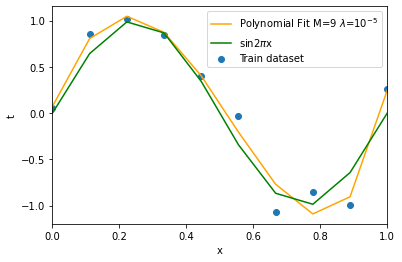

In [ ]:
#Now we plot for M=9 and lambda=10**-5
w90=fit_polynomial_reg(x,t,9,10**-5)
y9=[]
for i in range(len(x)):
   y9.append(w90[0]+w90[1]*x[i]+(w90[2]*x[i]**2)+(w90[3]*x[i]**3)+(w90[4]*x[i]**4)+(w90[5]*x[i]**5)+(w90[6]*x[i]**6)+(w90[7]*x[i]**7)+(w90[8]*x[i]**8)+(w90[9]*x[i]**9))

print("The w matrix is:",w90)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y9,label=r'Polynomial Fit M=9 $\lambda$=$10^{-5}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 0.25478367  5.21468188 -9.75793602 -3.76833145  1.15659449  3.15630299
  3.11251278  1.95739329  0.32908299 -1.38928018]


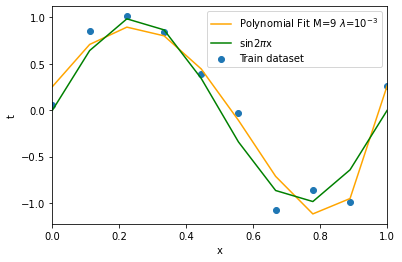

In [ ]:
#Now we plot for M=9 and lambda=10**-3
w90=fit_polynomial_reg(x,t,9,10**-3)
y9=[]
for i in range(len(x)):
   y9.append(w90[0]+w90[1]*x[i]+(w90[2]*x[i]**2)+(w90[3]*x[i]**3)+(w90[4]*x[i]**4)+(w90[5]*x[i]**5)+(w90[6]*x[i]**6)+(w90[7]*x[i]**7)+(w90[8]*x[i]**8)+(w90[9]*x[i]**9))

print("The w matrix is:",w90)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y9,label=r'Polynomial Fit M=9 $\lambda$=$10^{-3}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()


The w matrix is: [ 0.51498432  1.86392476 -3.69525855 -2.61943237 -0.95373917  0.24900336
  0.94679397  1.27521636  1.36635316  1.31726293]


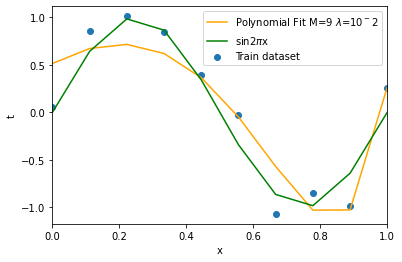

In [ ]:
#Now we plot for M=9 and lambda=10**-2
w90=fit_polynomial_reg(x,t,9,10**-2)
y9=[]
for i in range(len(x)):
   y9.append(w90[0]+w90[1]*x[i]+(w90[2]*x[i]**2)+(w90[3]*x[i]**3)+(w90[4]*x[i]**4)+(w90[5]*x[i]**5)+(w90[6]*x[i]**6)+(w90[7]*x[i]**7)+(w90[8]*x[i]**8)+(w90[9]*x[i]**9))

print("The w matrix is:",w90)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y9,label=r'Polynomial Fit M=9 $\lambda$=$10^-{2}$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

The w matrix is: [ 0.00592825 -0.01128931 -0.01194811 -0.00993233 -0.00774943 -0.00587582
 -0.00435296 -0.00313001 -0.00214581 -0.0013479 ]


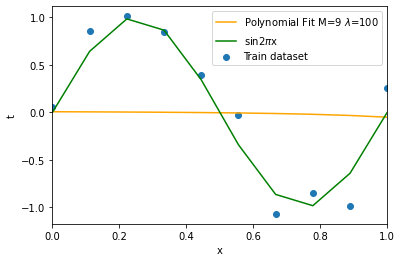

In [ ]:
#Now we plot for M=9 and lambda=100
w90=fit_polynomial_reg(x,t,9,100)
y9=[]
for i in range(len(x)):
   y9.append(w90[0]+w90[1]*x[i]+(w90[2]*x[i]**2)+(w90[3]*x[i]**3)+(w90[4]*x[i]**4)+(w90[5]*x[i]**5)+(w90[6]*x[i]**6)+(w90[7]*x[i]**7)+(w90[8]*x[i]**8)+(w90[9]*x[i]**9))

print("The w matrix is:",w90)
plt.figure()
plt.scatter(x,t,label="Train dataset")
plt.plot(x,y9,label=r'Polynomial Fit M=9 $\lambda$=$100$',color='orange')
plt.plot(x,y1,label=r'sin2$\pi$x',color='green')
plt.xlabel('x')
plt.ylabel('t')
plt.xlim(0,1)
plt.legend()
plt.show()

3. (1 point) $$\\ $$  Discuss your results. What is the effect of $\lambda$ on the model? What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


In general we can see that as λ increases we get better fitting but in larger λ the firring starts to get bad again. We can see that with increasing λ the values of **w** are dropping. In other words with big λ we have small **w**. This effect can be seen very clearly in the case of M=9. For λ=0 we get a really bad fit then for λ=0.00001 and λ=0.001 we get really good fits and then for bigger λ the fitting starts to be bad again. That happens because the diagonal λ matrix makes the  matrix incertivle even if we have M>N. Also because the λ decreases the **w** maybe it just decreases the terms that cause overfitting.